In [4]:
# When to use each measure:
#1. Mean: Best for symmetrical distributions without outliers. It considers all values, so it is sensitive to extremes.
#2. Median: Useful for skewed distributions or data with outliers as it is less affected by extremes.
#3. Mode: Suitable for categorical data or for understanding the most common value in numerical data.
#4. Variance: Helps understand the spread or dispersion of data around the mean.
#5. Quantiles: Useful for dividing data into intervals, understanding distributions, and detecting outliers.
#6. Outliers: Can distort mean significantly, making median a better measure for central tendency in such cases.

In [15]:
import numpy as np

consistent_data = [50, 51, 50, 49, 50, 51]
inconsistent_data = [50, 10, 90, 45, 60, 5]


In [16]:
mean_consistent = np.mean(consistent_data)
variance_consistent = np.var(consistent_data)

In [17]:
mean_inconsistent = np.mean(inconsistent_data)
variance_inconsistent = np.var(inconsistent_data)

In [18]:
print("Consistent Dataset:")
print(f"Mean: {mean_consistent}")
print(f"Variance: {variance_consistent}")

print("\nInconsistent Dataset:")
print(f"Mean: {mean_inconsistent}")
print(f"Variance: {variance_inconsistent}")


Consistent Dataset:
Mean: 50.166666666666664
Variance: 0.47222222222222215

Inconsistent Dataset:
Mean: 43.333333333333336
Variance: 847.2222222222222


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"  # Iris dataset
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
# Select a numerical column for analysis (e.g., sepal_length)
column = 'sepal_length'
data = df[column]
data

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [14]:
# Calculate statistical measures
mean_val = data.mean()
median_val = data.median()
#mode_val = mode(data).mode[0]
variance_val = data.var()
quantiles = data.quantile([0.25, 0.5, 0.75])  # 25th, 50th (median), and 75th percentiles

# Identify outliers using the Interquartile Range (IQR) method
q1 = quantiles[0.25]
q3 = quantiles[0.75]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Print results
print(f"Column: {column}")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
#print(f"Mode: {mode_val}")
print(f"Variance: {variance_val}")
print("Quantiles:")
print(quantiles)
print(f"Number of Outliers: {len(outliers)}")
print(f"Outliers: {outliers.tolist()}")

# Explanation of statistical measures
print("\n Insights about the dataset:")
print(f"- The mean ({mean_val:.2f}) represents the average sepal length of flowers.")
print(f"- The median ({median_val:.2f}) indicates the middle value, less affected by any outliers.")
#print(f"- The mode ({mode_val:.2f}) shows the most common sepal length in the dataset.")
print(f"- The variance ({variance_val:.2f}) reveals how spread out the sepal length values are.")
print(f"- Quantiles: Q1 ({q1:.2f}) and Q3 ({q3:.2f}) split the data into four equal parts, helping to identify outliers.")
print(f"- Outliers: {len(outliers)} values are unusually low or high.")


Column: sepal_length
Mean: 5.843333333333334
Median: 5.8
Variance: 0.6856935123042505
Quantiles:
0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal_length, dtype: float64
Number of Outliers: 0
Outliers: []

 Insights about the dataset:
- The mean (5.84) represents the average sepal length of flowers.
- The median (5.80) indicates the middle value, less affected by any outliers.
- The variance (0.69) reveals how spread out the sepal length values are.
- Quantiles: Q1 (5.10) and Q3 (6.40) split the data into four equal parts, helping to identify outliers.
- Outliers: 0 values are unusually low or high.


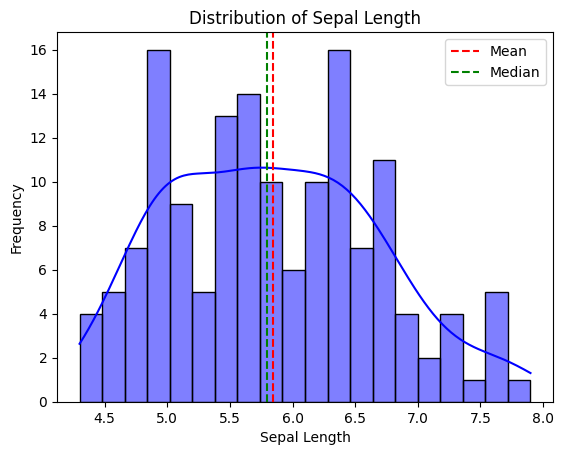

In [8]:
# Histogram with mean and median : Helps identify symmetry or skewness of the data.
sns.histplot(data, kde=True, bins=20, color='blue')
plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
plt.axvline(median_val, color='green', linestyle='--', label='Median')
#plt.axvline(mode_val, color='purple', linestyle='--', label='Mode')
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.legend()

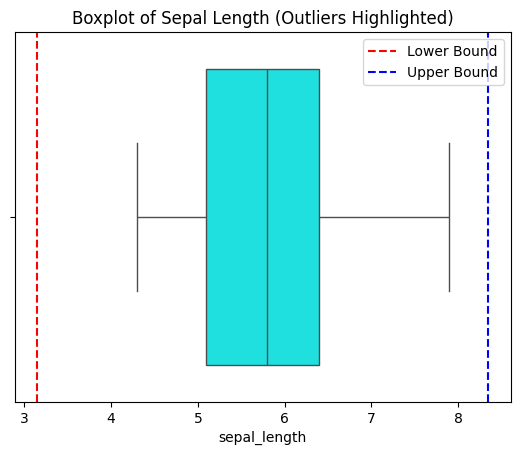

In [7]:
# Boxplot :Displays the spread of the data and highlights outliers.
# Shows IQR and points outside the whiskers as outliers.
sns.boxplot(x=data, color='cyan')
plt.title("Boxplot of Sepal Length (Outliers Highlighted)")
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
plt.legend()

Text(0.5, 1.0, 'Violin Plot Showing Spread (Variance)')

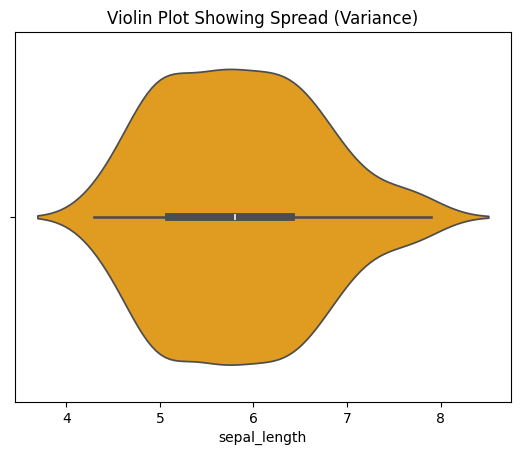

In [9]:
# Variance visualization (spread of data): Violin Plot: Combines boxplot and KDE to visualize the spread (variance).
# Provides a detailed look at data density and spread.
sns.violinplot(x=data, color='orange')
plt.title("Violin Plot Showing Spread (Variance)")